In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
df1=pd.read_csv('quikr_car.csv') #loading data

In [3]:
df1.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df1.shape

(892, 6)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
print(df1.dtypes) #checking dataypes

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object


In [7]:
backup=df1.copy()

In [8]:
df1['year'].unique

<bound method Series.unique of 0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object>

In [9]:
df2=df1[df1['year'].str.isnumeric()] #putting numeric values only

In [10]:
df2.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [11]:
df2['year'].unique

<bound method Series.unique of 0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: object>

In [12]:
df2['year']=df2['year'].astype(int) #converting to int

C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\3890431140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year']=df2['year'].astype(int) #converting to int


In [13]:
print(df2.dtypes)

name          object
company       object
year           int32
Price         object
kms_driven    object
fuel_type     object
dtype: object


In [14]:
df3=df2[df2['Price']!='Ask For Price']  # removing a non numeric group from 'Price'

In [15]:
df3['Price'].unique

<bound method Series.unique of 0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object>

In [16]:
df3['Price']=df3['Price'].str.replace(',','').astype(int) #removing commas from 'price'

C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\1675390020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Price']=df3['Price'].str.replace(',','').astype(int) #removing commas from 'price'


In [17]:
df3.head(5)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel


In [18]:
print(df3.dtypes)

name          object
company       object
year           int32
Price          int32
kms_driven    object
fuel_type     object
dtype: object


In [19]:
df3['kms_driven']=df3['kms_driven'].str.split().str.get(0).str.replace(',','') # removing kms and commas from 'kms_driven'

C:\Users\Admin\AppData\Local\Temp\ipykernel_8736\2629917536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['kms_driven']=df3['kms_driven'].str.split().str.get(0).str.replace(',','') # removing kms and commas from 'kms_driven'


In [20]:
df3['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [21]:
df4=df3[df3['kms_driven'].str.isnumeric()] #removing non numeric values

In [22]:
print(df4.dtypes)

name          object
company       object
year           int32
Price          int32
kms_driven    object
fuel_type     object
dtype: object


In [28]:
df5=df4[~df4['fuel_type'].isna()] #removing nan values

In [32]:
df5['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [34]:
df5.shape #initialy there were 892 rows

(816, 6)

In [36]:
df5['name']=df5['name'].str.split().str.slice(start=0,stop=3).str.join(' ') # we are taking first three words since there many words

In [37]:
df5.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
7,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
8,Ford EcoSport Ambiente,Ford,2016,830000,24530,Diesel
9,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
10,Skoda Fabia Classic,Skoda,2010,182000,60000,Petrol
11,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol


In [38]:
df6=df5.reset_index(drop=True) #reseting the index

In [39]:
df6.head(5)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [41]:
df6.to_csv('Cleaned_Car_data.csv') # Saving the cleaned data

In [44]:
df6.describe() 

,year,Price
count,816.000000,8.160000e+02
mean,2012.444853,4.117176e+05
std,4.002992,4.751844e+05
min,1995.000000,3.000000e+04
25%,2010.000000,1.750000e+05
50%,2013.000000,2.999990e+05
75%,2015.000000,4.912500e+05
max,2019.000000,8.500003e+06


In [47]:
df6=df6[df6['Price']<6000000] #there are some outliers as shown above

In [48]:
df6.shape

(815, 6)

# Data Visualization 

In [51]:
df6['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

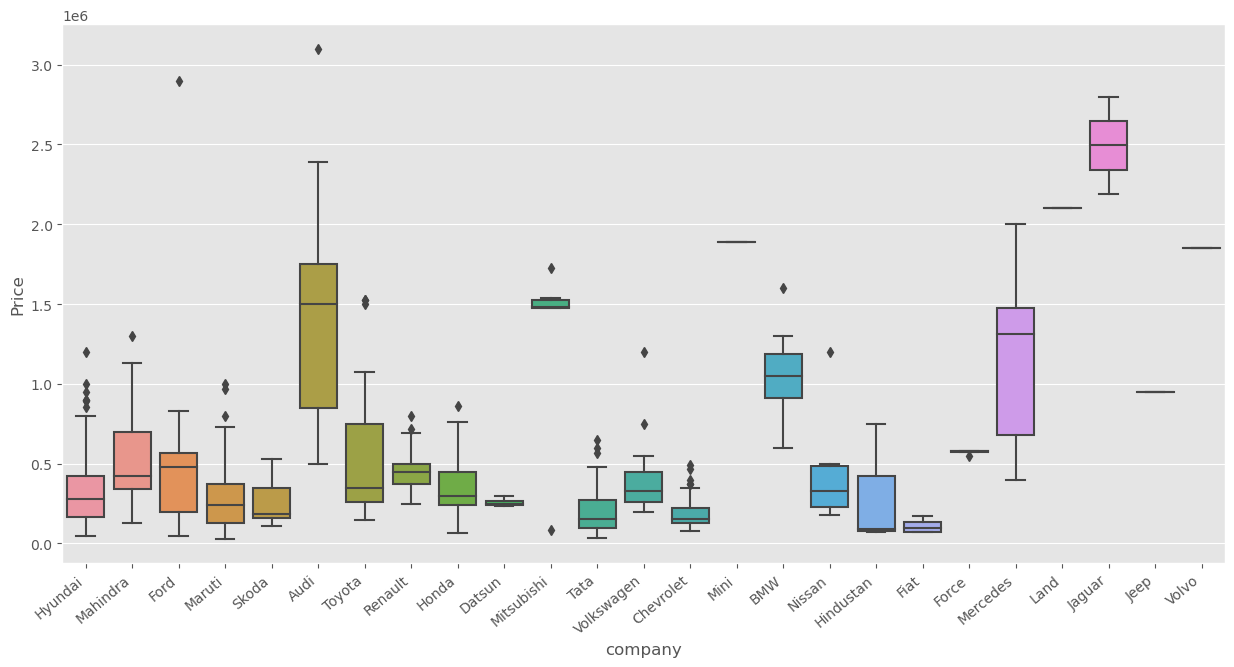

In [53]:
plt.subplots(figsize=(15,7))  # checking for price vs company
ax=sns.boxplot(x='company',y='Price',data=df6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


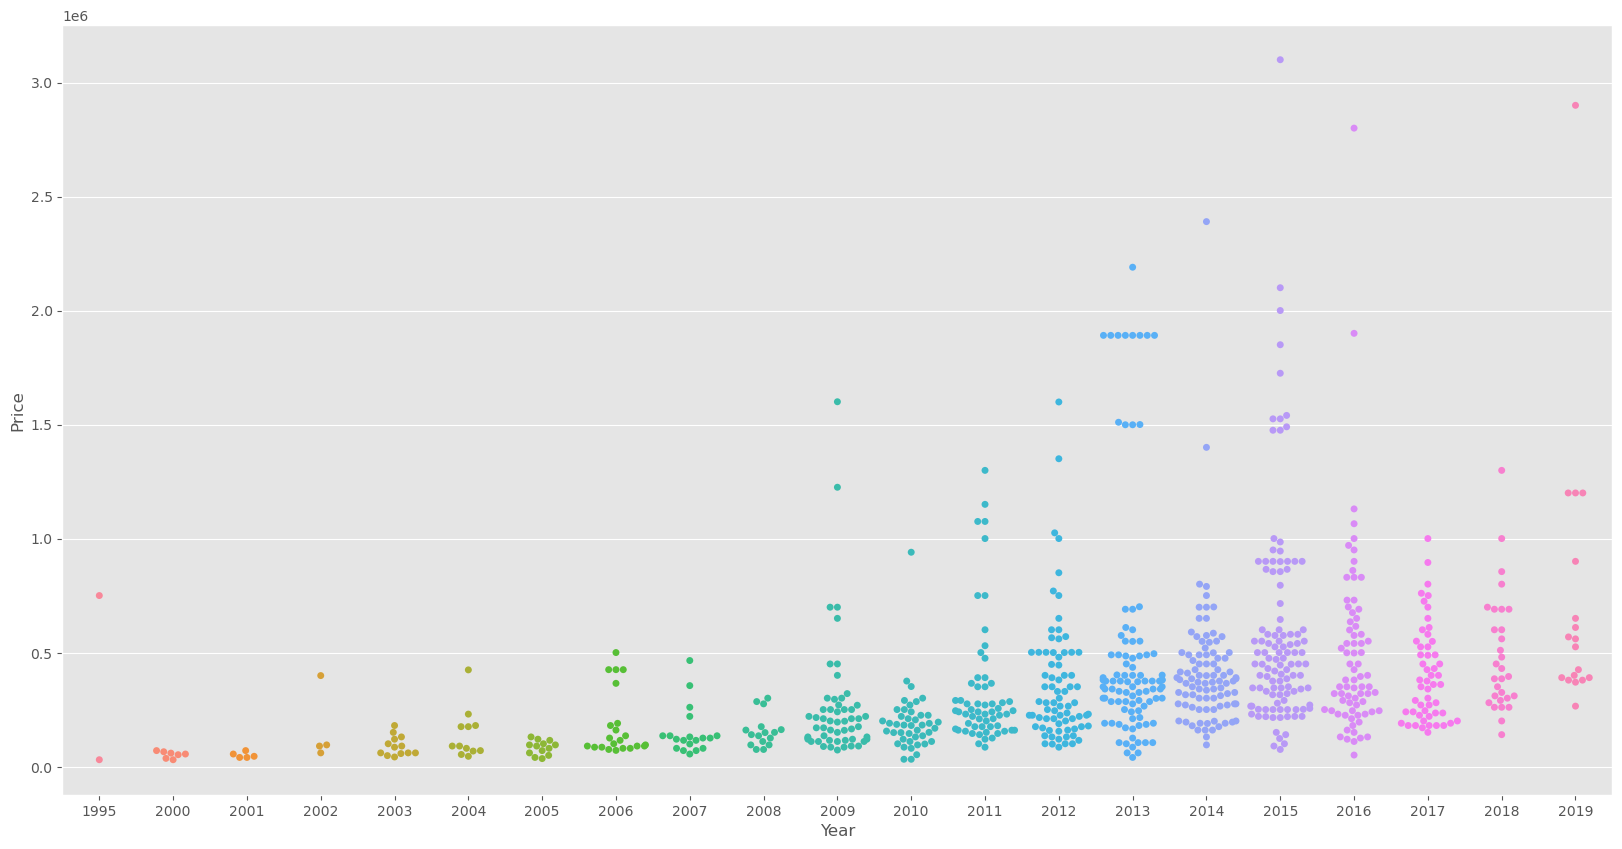

In [54]:
plt.subplots(figsize=(20,10)) #checking for year vs price
sns.swarmplot(x='year',y='Price',data=df6)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

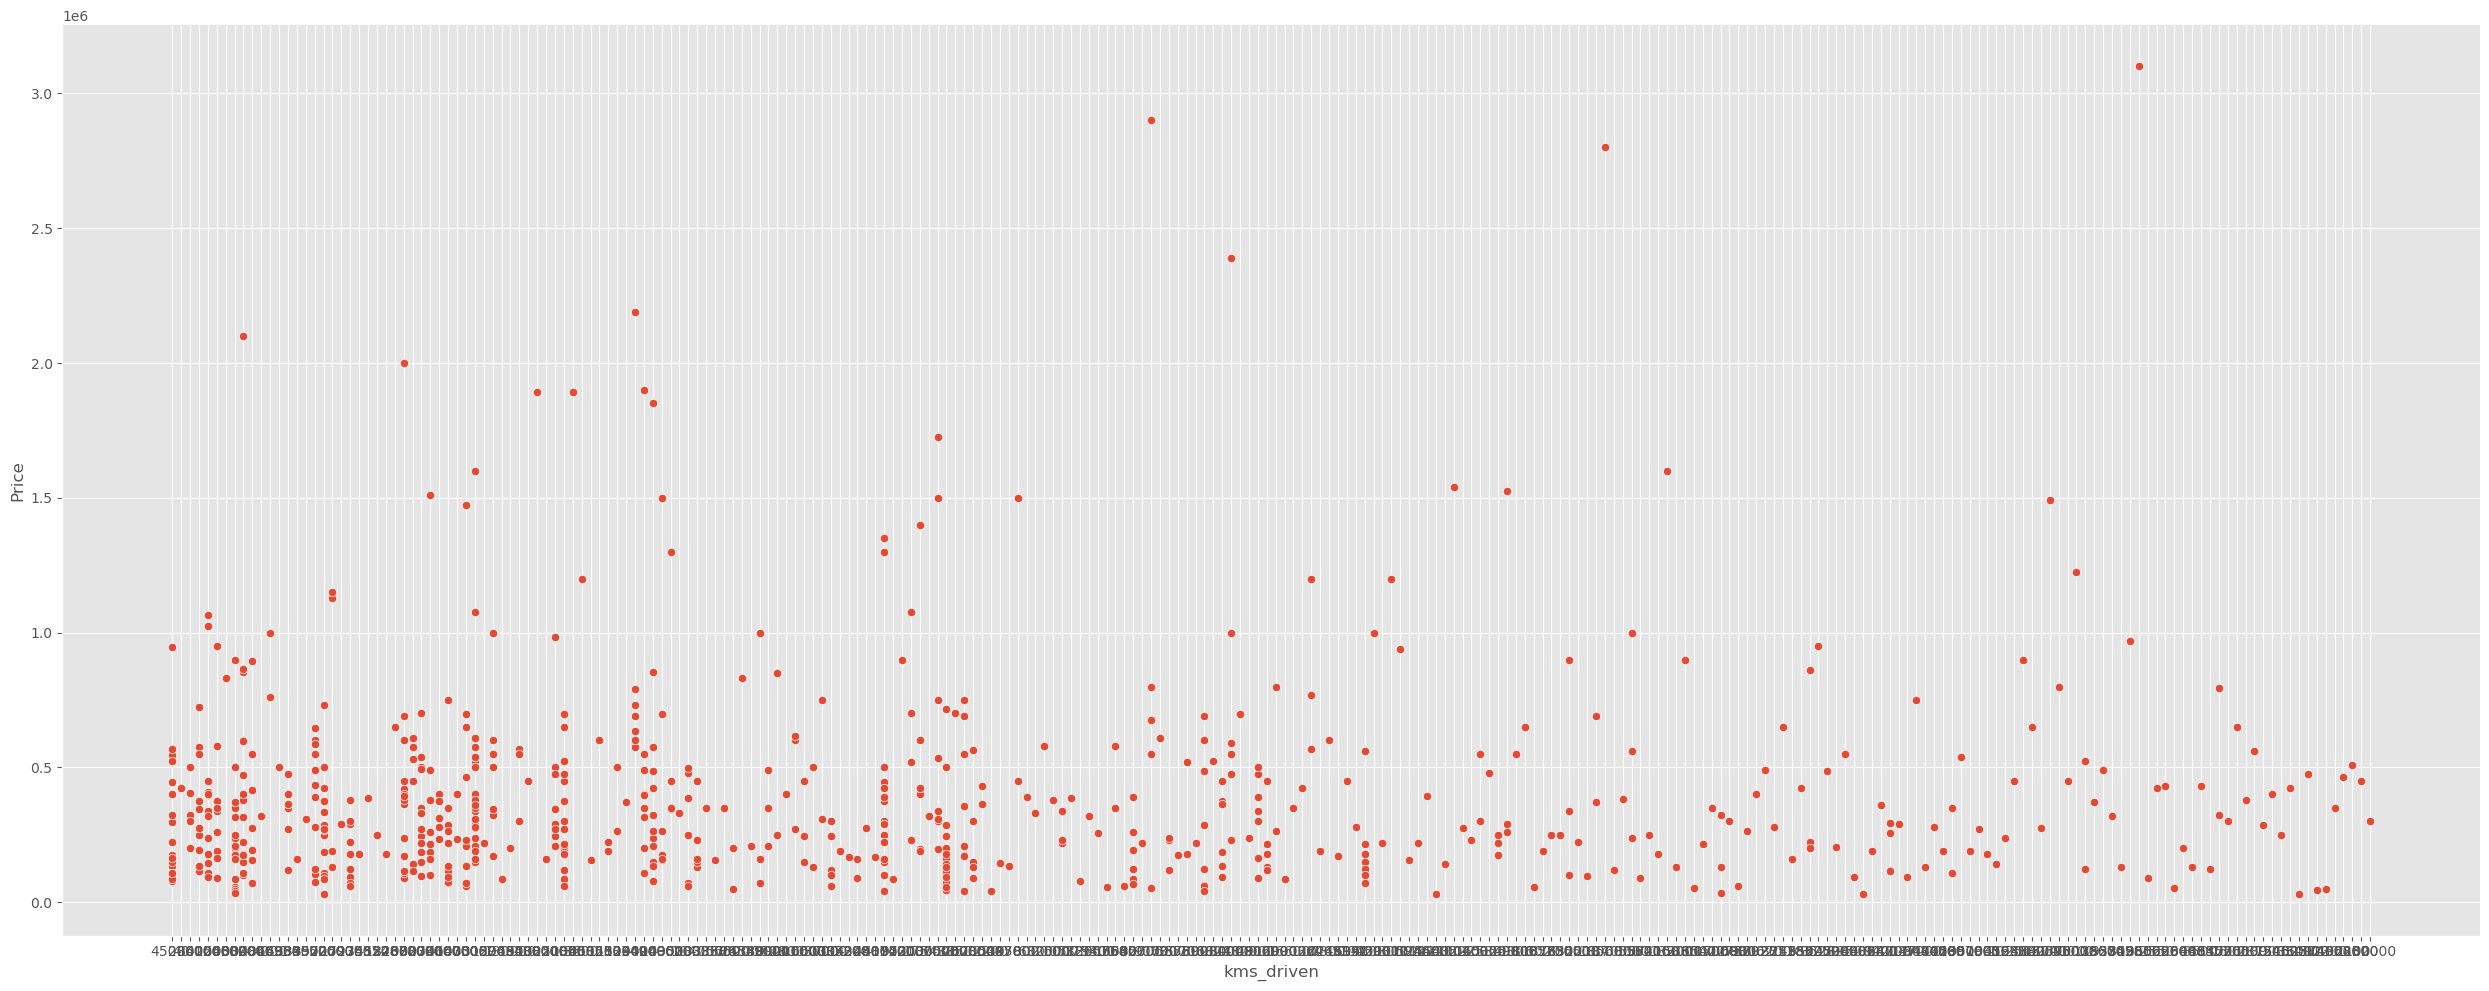

In [61]:
sns.relplot(x='kms_driven',y='Price',data=df6,height=10,aspect=2.5) #checking for kms vs price

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

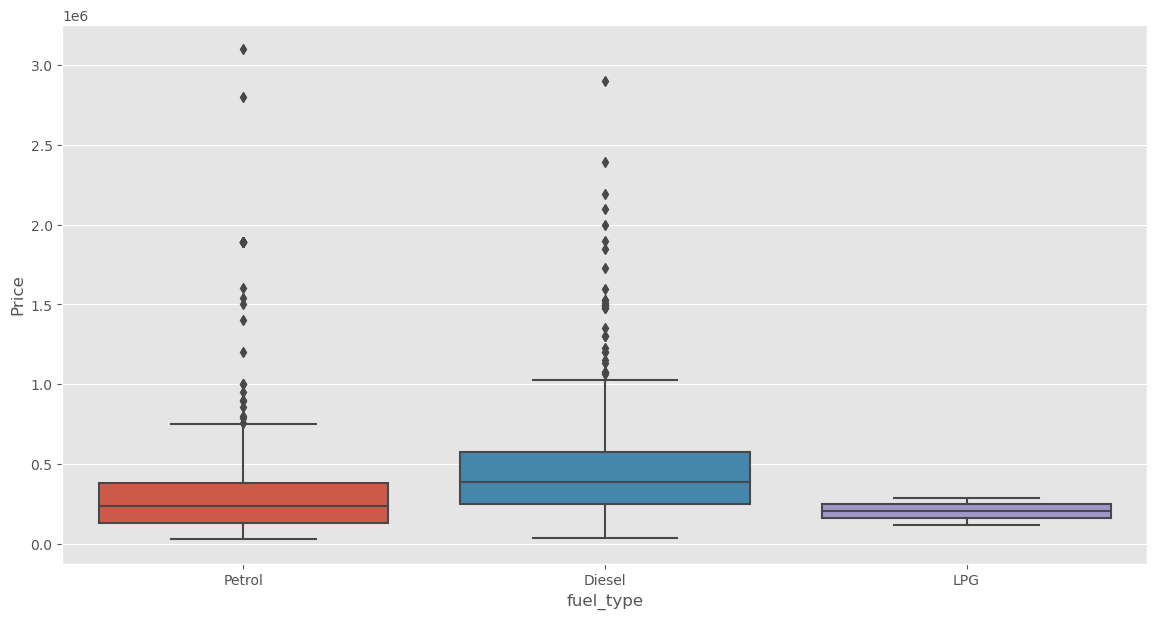

In [57]:
plt.subplots(figsize=(14,7)) #checking for fuel vs price 
sns.boxplot(x='fuel_type',y='Price',data=df6)

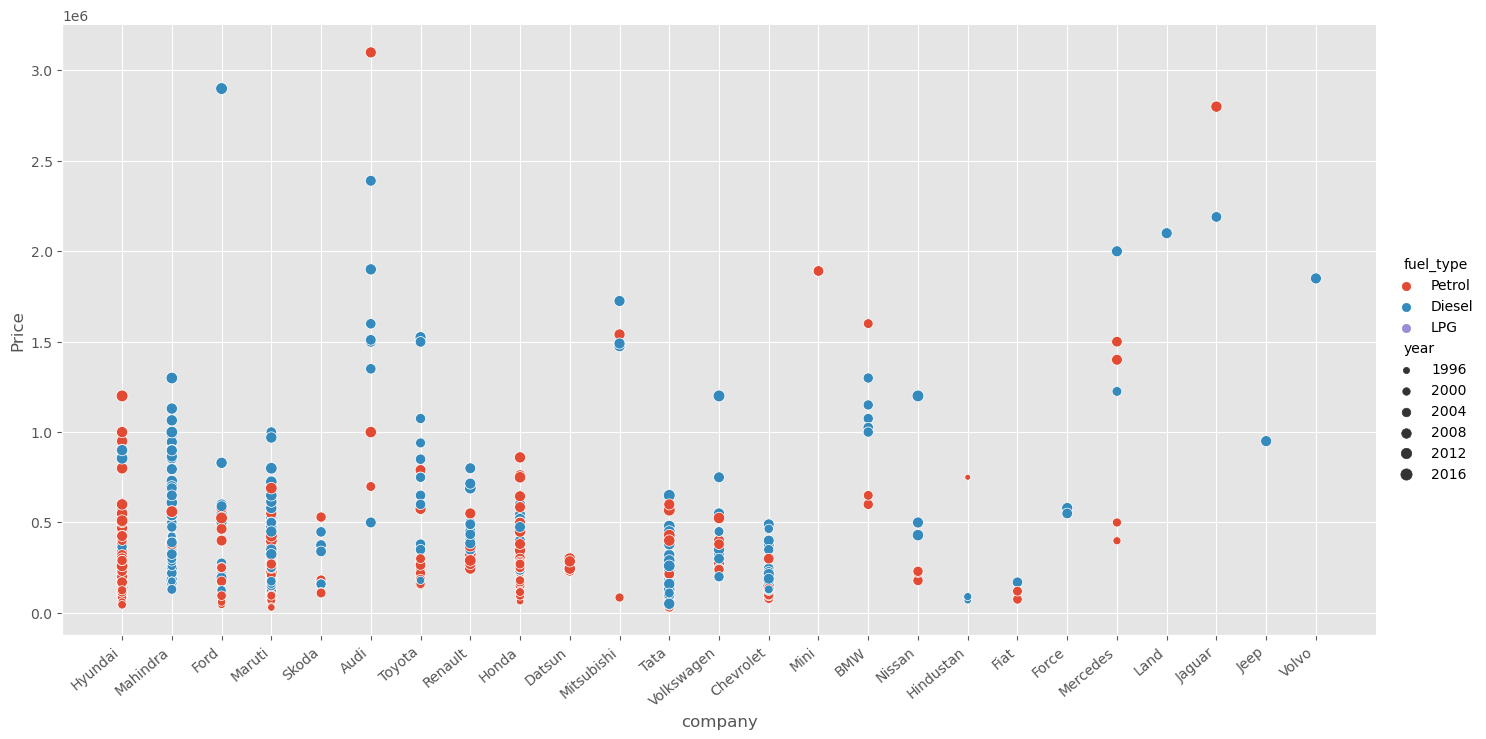

In [58]:
ax=sns.relplot(x='company',y='Price',data=df6,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

# training and testing data

In [68]:
X=df6[['name','company','year','kms_driven','fuel_type']] # allocating training and testing data
y=df6['Price']

In [69]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [70]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int32

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [81]:
from sklearn.linear_model import LinearRegression #importing linearregression model
from sklearn.preprocessing import OneHotEncoder   #importing onehotencoder
from sklearn.compose import make_column_transformer #import column transformer

In [82]:
ohe=OneHotEncoder() # creating onehotencoder object to contain all categories
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [83]:
lr=LinearRegression()

In [84]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [86]:
from sklearn.pipeline import make_pipeline #importing pipeline
from sklearn.metrics import r2_score  # import r2 score

In [87]:
pipe=make_pipeline(column_trans,lr) #making pipeline

# fitting the model

In [88]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [89]:
y_pred=pipe.predict(X_test)

In [90]:
r2_score(y_test,y_pred)

0.3999014389663015

# Finding the best model for higher score

In [91]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))


In [92]:
np.argmax(scores)

302

In [93]:
scores[np.argmax(scores)]

0.8991138463319752